In [82]:
# 0. Init
import seaborn as sns # for heatmaps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

data2 = pd.read_csv('activity_played.csv')
data2.head(10) 

#depends on rank

##
#plan : 
# track the least game played by all : NightClub Owner 
# group by account id. And then for each person who played 'NightClub Owner ', how many time do they played it 
# keep the index " which is the account_id "
# what is the time/ money amonut these people spent ?
# what is their failure rate at the game "Bike" ? 
# if the failure rate is high then probably the game is too hard.

###### specific segment where the total timeplay is low and are 
#they playing the same time amount/ money amoutn spent  -
#why are not playing that much (success/ failure rate ? or time line ? )
# who/how should we target ad and incentive so that these people are more motivated to play 



#they have bigger storage for money in safe so why 
# 200 hours - without nic in 4 hours

,account_id,platform_id,occur_date,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
0,123,PC,2020-10-10,Nightclub Owner,2.421073,0,0,0,13847.602000,497.001376,0
1,6579,XBOX,2020-09-23,Heist,3.755906,0,0,0,0.000000,331.334251,0
2,4223,XBOX,2020-09-07,Executive,1.075432,0,0,0,0.000000,3512.143060,1
3,1260,XBOX,2020-11-21,Heist,2.113035,0,0,0,0.000000,497.001376,0
4,8638,XBOX,2020-09-03,Heist,3.183063,0,0,0,0.000000,497.001376,0
5,8528,PS4,2020-09-18,Heist,0.779953,0,0,0,0.000000,72.893535,1
6,5828,PC,2020-10-27,Casino,0.539381,49,0,0,54.566199,265.067401,0
7,3183,PC,2020-11-17,Heist,1.259174,0,0,0,0.000000,497.001376,0
8,6982,XBOX,2020-10-31,Heist,0.421207,11,0,0,0.000000,124.250344,1
9,982,XBOX,2020-09-08,Executive,0.751181,0,0,0,0.000000,0.000000,0


In [55]:
# track the least game played by all : NightClub Owner 
print(data2['activity_type'].value_counts())
print()
nico = data2[data2['activity_type'] == 'Nightclub Owner']
nico=nico.sort_values('account_id')
df = nico.groupby('account_id')


Heist                          473976
Executive                      126278
Biker                           96970
Race                            53395
Gunrunner                       36540
Freeroam - Business Battles     28338
Casino                          21453
Nightclub Owner                  8668
Name: activity_type, dtype: int64



In [56]:
nico['time_spent'].describe()

count    8668.000000
mean        2.566882
std         1.020809
min         0.010808
25%         1.853634
50%         2.480519
75%         3.183063
max         6.490422
Name: time_spent, dtype: float64

In [57]:
df['time_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
account_id,,,,,,,,
0,1.0,2.777749,NaN,2.777749,2.777749,2.777749,2.777749,2.777749
5,1.0,5.182610,NaN,5.182610,5.182610,5.182610,5.182610,5.182610
9,4.0,2.457552,1.106352,1.605042,1.888761,2.072504,2.641294,4.080157
10,31.0,2.501264,1.177002,0.145913,1.777976,2.361627,2.861514,6.479614
11,2.0,3.115511,0.882728,2.491328,2.803419,3.115511,3.427602,3.739694
...,...,...,...,...,...,...,...,...
9478,1.0,3.896415,NaN,3.896415,3.896415,3.896415,3.896415,3.896415
9479,1.0,0.756585,NaN,0.756585,0.756585,0.756585,0.756585,0.756585
9500,3.0,2.655255,0.584060,2.058993,2.369734,2.680474,2.953385,3.226296


In [58]:
# group by account id. And then for each person who played 'Bike', how many time do they played it 
nico_time_played = nico.groupby('account_id')['activity_type'].value_counts()

print(nico_time_played) 
print("Max time played : " + str(nico_time_played.max()) ) #-> see his rank 
print("Min time played : " +str(nico_time_played.min())) #-> see his rank 
#print(allgames) 
#print(allgames[1].idxmax())
#print(allgames[1c].max())


account_id  activity_type  
0           Nightclub Owner     1
5           Nightclub Owner     1
9           Nightclub Owner     4
10          Nightclub Owner    31
11          Nightclub Owner     2
                               ..
9478        Nightclub Owner     1
9479        Nightclub Owner     1
9500        Nightclub Owner     3
9505        Nightclub Owner     2
9521        Nightclub Owner     1
Name: activity_type, Length: 2289, dtype: int64
Max time played : 101
Min time played : 1


In [59]:
#create a list of index to save this activity type :
index_time_played = nico_time_played.index.values.tolist()
time_played_index = list()

for i in index_time_played : 
    time_played_index.append(i[0])
print(time_played_index)

[0, 5, 9, 10, 11, 16, 19, 20, 21, 26, 36, 37, 42, 50, 53, 78, 83, 87, 93, 104, 108, 117, 120, 122, 123, 124, 127, 140, 143, 146, 147, 150, 151, 159, 162, 163, 166, 167, 170, 171, 173, 176, 177, 181, 183, 184, 187, 190, 191, 193, 195, 201, 202, 204, 206, 209, 212, 222, 226, 242, 244, 245, 247, 249, 251, 254, 259, 264, 267, 269, 272, 275, 279, 285, 293, 311, 317, 319, 320, 322, 324, 325, 328, 329, 344, 349, 357, 358, 361, 362, 363, 365, 368, 372, 376, 382, 383, 389, 392, 399, 402, 408, 411, 417, 418, 421, 423, 428, 429, 439, 440, 450, 459, 461, 465, 466, 467, 468, 476, 477, 481, 482, 483, 485, 486, 489, 491, 492, 493, 495, 499, 503, 513, 516, 517, 519, 521, 527, 531, 532, 534, 535, 536, 541, 542, 543, 546, 548, 552, 554, 561, 568, 572, 573, 579, 588, 594, 595, 601, 609, 614, 617, 619, 620, 621, 622, 624, 637, 641, 642, 643, 644, 655, 661, 666, 667, 668, 670, 673, 677, 680, 681, 698, 703, 704, 710, 715, 722, 728, 729, 734, 744, 745, 752, 760, 764, 765, 768, 769, 773, 776, 778, 779, 781, 7

In [60]:

for i in range(0, 2289): 
    idx = time_played_index[i]
    print(idx)


0
5
9
10
11
16
19
20
21
26
36
37
42
50
53
78
83
87
93
104
108
117
120
122
123
124
127
140
143
146
147
150
151
159
162
163
166
167
170
171
173
176
177
181
183
184
187
190
191
193
195
201
202
204
206
209
212
222
226
242
244
245
247
249
251
254
259
264
267
269
272
275
279
285
293
311
317
319
320
322
324
325
328
329
344
349
357
358
361
362
363
365
368
372
376
382
383
389
392
399
402
408
411
417
418
421
423
428
429
439
440
450
459
461
465
466
467
468
476
477
481
482
483
485
486
489
491
492
493
495
499
503
513
516
517
519
521
527
531
532
534
535
536
541
542
543
546
548
552
554
561
568
572
573
579
588
594
595
601
609
614
617
619
620
621
622
624
637
641
642
643
644
655
661
666
667
668
670
673
677
680
681
698
703
704
710
715
722
728
729
734
744
745
752
760
764
765
768
769
773
776
778
779
781
782
784
788
791
795
797
800
803
805
809
813
816
820
824
825
828
831
833
837
840
845
846
854
855
864
865
867
870
871
872
880
890
892
898
903
905
909
912
913
914
919
920
924
925
928
940
942
946
949
951
961
96

In [61]:

#print(nico_time_played[9].values) 
time_played_val = list()
for i in range(0, len(time_played_index)): 
    idx = time_played_index[i]
    val = int(nico_time_played[idx].values)
    time_played_val.append(val)
newdf = pd.DataFrame(time_played_val)
print(newdf)

       0
0      1
1      1
2      4
3     31
4      2
...   ..
2284   1
2285   1
2286   3
2287   2
2288   1

[2289 rows x 1 columns]


In [62]:
# how long does these people spent on the game biker ?
nico_time_spent = nico.groupby('account_id').sum()['time_spent']
print(nico_time_spent)
print("Max time spent : " + str(round(nico_time_spent.max(),2))) #-> see his rank 
print("Min time spent : " +str(round(nico_time_spent.min(),2))) #-> see his rank print(nico_time_spent.min())

account_id
0        2.777749
5        5.182610
9        9.830206
10      77.539197
11       6.231021
          ...    
9478     3.896415
9479     0.756585
9500     7.965764
9505     4.755680
9521     1.988739
Name: time_spent, Length: 2289, dtype: float64
Max time spent : 256.51
Min time spent : 0.09


In [63]:
# what is the sucess rate ? 

nico_success_rate =nico.groupby('account_id')['success'].mean()
nico_success_rate.head()


account_id
0     0.0
5     0.0
9     0.0
10    0.0
11    0.0
Name: success, dtype: float64

In [64]:
# how much does these people earn in rpd ?
nico_rp_earned =nico.groupby('account_id').sum()['rp_earned']
print(round(nico_rp_earned),4)
print("Max rp earned : " + str(round(nico_rp_earned.max(),2))) #-> see his rank 
print("Min rp earned : " + str(round(nico_rp_earned.min(),2))) #-> see his rank 


account_id
0         265.0
5         497.0
9        1491.0
10      14413.0
11        563.0
         ...   
9478      497.0
9479       66.0
9500     1292.0
9505      994.0
9521      199.0
Name: rp_earned, Length: 2289, dtype: float64 4
Max rp earned : 48838.67
Min rp earned : 0.0


In [65]:
# how much does these people earn in GTA money ?
nico_money_earned =nico.groupby('account_id').sum()['money_earned']
print(round(nico_money_earned),4)
print("Max money earned : " + str(round(nico_money_earned.max(),2))) #-> see his rank 
print("Min money earned : " + str(round(nico_money_earned.min(),2))) #-> see his rank 
avgrpd = DataFrame(nico_money_earned, columns =['money_earned'])
 
set1 = nico_money_earned.loc[nico_money_earned > 3769566.425]

set2 = nico_money_earned.loc[nico_money_earned <= 3769566.425*3] 

list1 = set1.index.values.tolist()

list2 = set2.index.values.tolist()



account_id
0             0.0
5        245101.0
9        570656.0
10      1569242.0
11            0.0
          ...    
9478      42556.0
9479          0.0
9500     176042.0
9505      63375.0
9521          0.0
Name: money_earned, Length: 2289, dtype: float64 4
Max money earned : 15078265.7
Min money earned : 0.0


In [98]:
x1=pd.concat([nico_money_earned,nico_rp_earned],axis=1)
y1 = nico_time_spent
model = LinearRegression().fit(x1,y1)
rSqr = model.score(x1,y1)
print(rSqr)

0.9569834031187453


In [99]:
# split 20-80 to train and test data
xTrain, xTest, yTrain, yTest = train_test_split(x1,y1,test_size = 0.2,random_state=0)
model = LinearRegression().fit(xTrain,yTrain)
rSqr = model.score(xTest,yTest)
print(rSqr)

0.9687229505467274


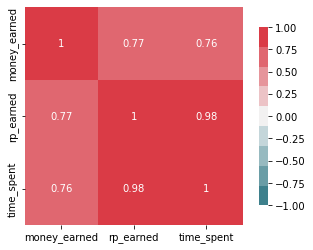

In [100]:
datta = pd.concat([nico_money_earned,nico_rp_earned,nico_time_spent],axis=1)
corr = datta.corr()
sns.heatmap(corr, # correlation data
           vmin=-1, vmax=1, # min and max values to display
           square=True, # display in a square shape
           annot=True, # overlay values
           cmap=sns.diverging_palette(210, 10, n=9), # choose a better color palette
           cbar_kws={"shrink": .82} # resize the color bar
           )

plt.show()

In [69]:
df = nico.groupby('account_id')['time_spent'].mean()
print(df)

account_id
0       2.777749
5       5.182610
9       2.457552
10      2.501264
11      3.115511
          ...   
9478    3.896415
9479    0.756585
9500    2.655255
9505    2.377840
9521    1.988739
Name: time_spent, Length: 2289, dtype: float64


In [102]:
x1=pd.concat([nico_success_rate],axis=1)
y1 = nico_time_spent
model = LinearRegression().fit(x1,y1)
rSqr = model.score(x1,y1)
print(rSqr)

0.00015964712457039454


In [103]:
# split 20-80 to train and test data
xTrain, xTest, yTrain, yTest = train_test_split(x1,y1,test_size = 0.2,random_state=0)
model = LinearRegression().fit(xTrain,yTrain)
rSqr = model.score(xTest,yTest)
print(rSqr)

-0.0055000220920427


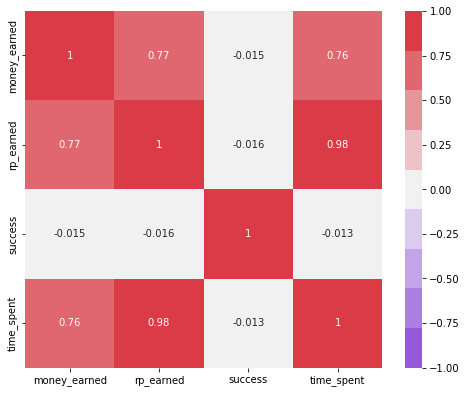

In [109]:
datta = pd.concat([nico_money_earned,nico_rp_earned,nico_success_rate,nico_time_spent],axis=1)
corr = datta.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, # correlation data
           vmin=-1, vmax=1, # min and max values to display
           square=True, # display in a square shape
           annot=True, # overlay values
           cmap=sns.diverging_palette(280, 10, n=9), # choose a better color palette
           cbar_kws={"shrink": .82} # resize the color bar
           )

plt.show()

In [74]:
x2=pd.concat([nico_money_earned,nico_rp_earned],axis=1)
y2 = nico_success_rate
model = LinearRegression().fit(x2,y2)
rSqr = model.score(x2,y2)
print(rSqr)

0.00029081914234585504


In [75]:
# split 20-80 to train and test data
xTrain, xTest, yTrain, yTest = train_test_split(x2,y2,test_size = 0.2,random_state=0)
model = LinearRegression().fit(xTrain,yTrain)
rSqr = model.score(xTest,yTest)
print(rSqr)

1.3073161909016306e-05


In [76]:
print(nico['deaths'].value_counts())
# no death at all 
# safe 

0    8668
Name: deaths, dtype: int64


In [77]:
print(nico['suicides'].value_counts())
#no suicide 

0    8668
Name: suicides, dtype: int64
